# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import tweepy
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name = 'new_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
images = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(images.content)
    
image_df = pd.read_csv('new_folder/image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
file_name = 'tweet-json.txt'
with open(file_name, 'r') as file:
    tweet_ids = []
    retweet_counts = []
    favorite_counts = []
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        tweet_ids.append(tweet_id)
        retweet_counts.append(retweet_count)
        favorite_counts.append(favorite_count)
    tweet_dict = {'tweet_id' : tweet_ids, 'retweet_count' : retweet_counts, 'favorite_count' : favorite_counts}

tweet_df = pd.DataFrame(tweet_dict)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [8]:
sum(archive_df.name == 'the')

8

In [9]:
archive_df['in_reply_to_status_id'].max()

8.8626635707512832e+17

In [10]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2142,669972011175813120,NaN,NaN,2015-11-26 20:12:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see really big dog cuddling smaller do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669972011...,10,10,None,None,None,None,None
1412,698953797952008193,NaN,NaN,2016-02-14 19:35:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet CeCe. She wanted to take a selfie before ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698953797...,11,10,CeCe,None,None,None,None
364,829141528400556032,NaN,NaN,2017-02-08 01:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He goes from sneaky tongue sl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829141528...,12,10,Malcolm,None,None,None,None
1577,687399393394311168,NaN,NaN,2016-01-13 22:22:41 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Barry. He's very fast. I hope he finds...,NaN,NaN,NaN,https://vine.co/v/iM2hLu9LU5i,10,10,Barry,None,None,None,None
278,840268004936019968,NaN,NaN,2017-03-10 18:27:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monty. He makes instantly regrettable ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840268004...,12,10,Monty,None,None,None,None


In [11]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
archive_df[archive_df['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [13]:
archive_df[archive_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [14]:
doggo_nan = archive_df['doggo']=='None'
floofer_nan = archive_df['floofer'] == 'None'
pupper_nan = archive_df['pupper'] == 'None'
puppo_nan = archive_df['puppo'] == 'None'

nan_stage = archive_df[doggo_nan & floofer_nan & pupper_nan & puppo_nan]
nan_stage

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [15]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [19]:
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [20]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
tweet_df.duplicated().sum()

0

In [22]:
tweet_df.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [23]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
1. Nulls represented as None string in doggo, floofer, pupper, puppo.

2. Rating denominator having inaccurate values of 0, 2, 110 e.t.c .

3. Rating denominator and numerator having a maximum value of 170 and 1776 respectively.

4. date is needed much more for analysis compared to timestamp.

5. source needs to be simplified e.g iPhone.

6. Some dog's name are replaced with 'a', 'an' or 'the'.

7. Retweet entries aren't needed.

8. columns like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls aren't needed.

### Tidiness issues
1. doggo, floofer, pupper, puppo are meant to be under one column.

2. tweet_df should be joined with the archive_df

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
archive_df_clean = archive_df.copy()
image_df_clean = image_df.copy()
tweet_df_clean = tweet_df.copy()

### Issue #1:

#### Nulls represented as None string in doggo, floofer, pupper, puppo.

##### Define
Replace the "None" string values with Nan

#### Code

In [25]:
archive_df_clean['doggo'] = archive_df_clean['doggo'].replace(r'None', np.NaN, regex=True)
archive_df_clean['floofer'] = archive_df_clean['floofer'].replace(r'None', np.NaN, regex=True)
archive_df_clean['pupper'] = archive_df_clean['pupper'].replace(r'None', np.NaN, regex=True)
archive_df_clean['puppo'] = archive_df_clean['puppo'].replace(r'None', np.NaN, regex=True)

#### Test

In [26]:
archive_df_clean.iloc[:, 13:].sample(10)

,doggo,floofer,pupper,puppo
1090,NaN,NaN,NaN,NaN
2219,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN
2192,NaN,NaN,NaN,NaN
1157,NaN,NaN,pupper,NaN
468,NaN,NaN,NaN,NaN
1779,NaN,NaN,NaN,NaN
837,NaN,NaN,NaN,NaN
2303,NaN,NaN,NaN,NaN
1381,NaN,NaN,NaN,NaN


### Issue #2:

#### rating_denominator having inaccurate values of 0, 2, 110 e.t.c .
Since the denominators are most likely 10, we need to replace the different values with 10.

#### Code

In [27]:
archive_df_clean['rating_denominator'] = 10

#### Test

In [28]:
archive_df_clean['rating_denominator'].head()

0    10
1    10
2    10
3    10
4    10
Name: rating_denominator, dtype: int64

In [29]:
archive_df_clean['rating_denominator'].sample(5)

1265    10
232     10
1441    10
2048    10
106     10
Name: rating_denominator, dtype: int64

# Issue 3

#### Some dog's name are replaced with 'a', 'an' or 'the'.

##### Define
Most trends that introduce name starts with "This is.." or "Meet...", we can replace the errors with a regular expression that match this pattern.

#### Code

In [30]:
lists1 = np.array(archive_df_clean.text.str.extract('((This is (?:[A-Z]\w+[ -]?)+)|Meet (?:[A-Z]\w+[ -]?)+)')[0])
names = []
nan = np.nan
for l in lists1:
    if 'This is ' in str(l):
        names.append(str(l)[7:])
    elif 'Meet ' in str(l):
        names.append(str(l)[5:])
    else:
        names.append("None")
        
archive_df_clean.name = names
archive_df_clean.name = archive_df_clean.name.replace('None', np.NaN, regex=True)

#### Test

In [31]:
archive_df_clean.loc[:,['text', 'name']].sample(10)

,text,name
1547,This is Herald. He wants you to know he could ...,Herald
2008,Mighty rare dogs here. Long smooth necks. Grea...,NaN
201,Say hello to Alice. I'm told she enjoys car ri...,NaN
1334,This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,Ambrose
814,Another pic without a dog in it? What am I sup...,NaN
1806,Here we see a rare pouched pupper. Ample stora...,NaN
348,This is Daisy. She has a heart on her butt. 13...,Daisy
1837,"""Yes hello I'ma just snag this here toasted ba...",NaN
548,Meet Sansa and Gary. They run along the fence ...,Sansa
2020,This is Tuco. That's the toast that killed his...,Tuco


In [32]:
archive_df_clean.name.isna().sum()

957

## Issue#4

### doggo, floofer, pupper, puppo are meant to be under one column.

##### Define
Extract the keywords from the text, and put them under one column "stage".

##### Code

In [33]:
stage_l = archive_df_clean.text.str.extract('(doggo|floofer|pupper|puppo)')
archive_df_clean['stage'] = stage_l
archive_df_clean = archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [34]:
archive_df_clean.stage.sample(10)

2235       NaN
1173    pupper
1817    pupper
521        NaN
16         NaN
186        NaN
1946       NaN
5          NaN
920        NaN
632        NaN
Name: stage, dtype: object

## Issue#5

#### Retweet entries aren't needed.

##### Define
Drop entries that that has non-null retweet_status_id

##### Code

In [35]:
archive_df_clean = archive_df_clean[archive_df_clean['retweeted_status_id'].isna()]

##### Test

In [36]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1294 non-null object
stage                         364 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


## Issue#6

#### Rating denominator and numerator having a maximum value of 170 and 1776 respectively.

##### Define
The ratings numerator will be needed to be extracted again, the few outliers will be left out.

##### code

In [37]:
rating = archive_df_clean.text.str.extract('(\d+/10)')
rating = rating.astype(str)
archive_df_clean['rating_numerator'] ,archive_df_clean['rating_denominator'] = rating[0].str.split('/').str
archive_df_clean['rating_numerator'] = archive_df_clean['rating_numerator'].astype(np.float)

##### Test

In [38]:
archive_df_clean['rating_numerator'].value_counts()

12.0      500
10.0      443
11.0      426
13.0      309
9.0       156
8.0        98
7.0        53
14.0       44
5.0        36
6.0        32
3.0        19
4.0        15
2.0         9
1.0         7
0.0         2
420.0       2
17.0        1
182.0       1
15.0        1
75.0        1
26.0        1
1776.0      1
666.0       1
27.0        1
Name: rating_numerator, dtype: int64

### Issue#7

#### source needs to be simplified e.g iPhone.

##### Define
extract the various tweet sources from the source column

##### Code

In [39]:
archive_df_clean['source'] = archive_df_clean.source.str.extract('(iphone|Twitter (Web)|vine|tweetdeck)')

##### Test

In [40]:
archive_df_clean['source'].value_counts()

iphone         2042
vine             91
Twitter Web      31
tweetdeck        11
Name: source, dtype: int64

## Issue#8

#### date is needed much more for analysis compared to timestamp.

##### Define
extract the date from the timestamp column and store in anew column 'date', drop the timestamp column.

##### Code

In [41]:
archive_df_clean['date'] = archive_df_clean['timestamp'].str.extract('(....-..-..)')
archive_df_clean['date'] = pd.to_datetime(archive_df_clean['date'])
archive_df_clean = archive_df_clean.drop(['timestamp'], axis=1)

##### Test

In [42]:
archive_df_clean['date'].sample(10)

1305   2016-03-09
2059   2015-11-30
1810   2015-12-15
807    2016-09-03
419    2017-01-20
722    2016-10-03
769    2016-09-17
831    2016-08-25
89     2017-06-14
404    2017-01-24
Name: date, dtype: datetime64[ns]

## Issue#9

#### columns like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls aren't needed.#### 

##### Define
Drop the columns mentioned above.

##### Code

In [43]:
archive_df_clean = archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1)

##### Test

In [44]:
archive_df_clean

,tweet_id,source,text,rating_numerator,rating_denominator,name,stage,date
0,892420643555336193,iphone,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,2017-08-01
1,892177421306343426,iphone,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,2017-08-01
2,891815181378084864,iphone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,2017-07-31
3,891689557279858688,iphone,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,2017-07-30
4,891327558926688256,iphone,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,2017-07-29
5,891087950875897856,iphone,Here we have a majestic great white breaching ...,13.0,10,NaN,NaN,2017-07-29
6,890971913173991426,iphone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,NaN,2017-07-28
7,890729181411237888,iphone,When you watch your owner call another dog a g...,13.0,10,NaN,NaN,2017-07-28
8,890609185150312448,iphone,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,NaN,2017-07-27
9,890240255349198849,iphone,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,2017-07-26


## Issue#10

#### tweet_df, archive_df_clean and image_df should be joined with a master dataframe.
##### Define
Join archive_df_clean with tweet_df_clean on tweet_id, then join the resulting dataframe with image_df to form twitter_master_df.

##### Code

In [45]:
tweets_df = pd.merge(archive_df_clean, tweet_df_clean, on='tweet_id')

In [46]:
#merging all dataframes into twitter_master_df

twitter_master_df = pd.merge(tweets_df, image_df, on='tweet_id')

##### Test

In [47]:
twitter_master_df

,tweet_id,source,text,rating_numerator,rating_denominator,name,stage,date,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,iphone,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,2017-08-01,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,iphone,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,2017-08-01,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,iphone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,2017-07-31,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,iphone,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,2017-07-30,8964,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,iphone,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,2017-07-29,9774,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,iphone,Here we have a majestic great white breaching ...,13.0,10,NaN,NaN,2017-07-29,3261,20562,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,iphone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,NaN,2017-07-28,2158,12041,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,iphone,When you watch your owner call another dog a g...,13.0,10,NaN,NaN,2017-07-28,16716,56848,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,iphone,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,NaN,2017-07-27,4429,28226,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,iphone,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,2017-07-26,7711,32467,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [48]:
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null int64
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1981 non-null float64
rating_denominator    1981 non-null object
name                  1255 non-null object
stage                 326 non-null object
date                  1994 non-null datetime64[ns]
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [49]:
twitter_master_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [50]:
#comparing the efficiency of the prediction algorithm
comp1 = twitter_master_df['p1_dog'].value_counts()
comp1

True     1477
False     517
Name: p1_dog, dtype: int64

In [51]:
comp2 = twitter_master_df['p2_dog'].value_counts()
comp2

True     1495
False     499
Name: p2_dog, dtype: int64

In [52]:
comp3 = twitter_master_df['p3_dog'].value_counts()
comp3

True     1446
False     548
Name: p3_dog, dtype: int64

In [53]:
#finding out which dog stage has most average numerator rating (doggo, floofer, pupper, puppo.)
doggo_df = twitter_master_df[twitter_master_df['stage']=='doggo']
floofer_df = twitter_master_df[twitter_master_df['stage']=='floofer']
pupper_df = twitter_master_df[twitter_master_df['stage']=='pupper']
puppo_df = twitter_master_df[twitter_master_df['stage']=='puppo']

In [54]:
doggo_df['rating_numerator'].mean()

11.633802816901408

In [55]:
floofer_df['rating_numerator'].mean()

12.666666666666666

In [56]:
pupper_df['rating_numerator'].mean()

10.631336405529954

In [57]:
puppo_df['rating_numerator'].mean()

12.142857142857142

### Visualization

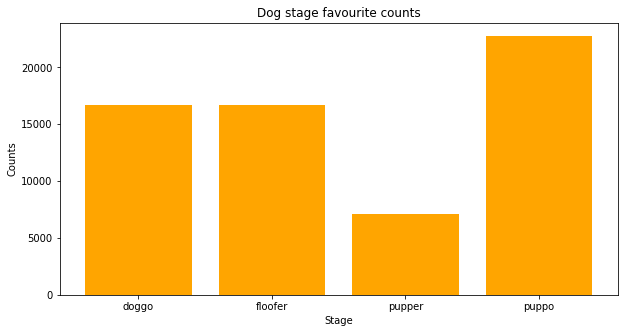

In [64]:
#comparing the average favourite counts  of each dog stage
favcount_doggo = doggo_df['favorite_count'].mean()
favcount_floofer = floofer_df['favorite_count'].mean()
favcount_pupper = pupper_df['favorite_count'].mean()
favcount_puppo = puppo_df['favorite_count'].mean()

data = {'doggo':favcount_doggo, 'floofer':favcount_doggo, 'pupper':favcount_pupper, 'puppo':favcount_puppo}
x = list(data.keys())
y = list(data.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(x, y, color='orange')
plt.xlabel('Stage')
plt.ylabel('Counts')
plt.title('Dog stage favourite counts')
plt.show()

### Insights:
1. The second image prediction has more true predictions compared to others, hence tends to be more efficient.

2. The floofer stage has the highest average rating. 

3. The puppo stage has the highest favorite counts.